In [1]:
from __future__ import print_function
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from datetime import datetime, date, time, timedelta
%matplotlib inline

In [2]:
# Read data
AAPL = pd.read_csv("../Data/AAPL_05222012_0930_1300_LOB_2.csv")

In [3]:
# Change column name
AAPL.columns = [col_name.split('.')[1] if len(col_name) > 5 else col_name for col_name in AAPL.columns]

# Dimension of the data frame
AAPL.shape

(332673, 62)

### Basic Set

In [4]:
# Price and Volume
AAPL.columns

Index([u'Index', u'Time', u'BID_PRICE1', u'BID_UPDATE_TIME1', u'BID_SIZE1',
       u'ASK_PRICE1', u'ASK_UPDATE_TIME1', u'ASK_SIZE1', u'BID_PRICE2',
       u'BID_UPDATE_TIME2', u'BID_SIZE2', u'ASK_PRICE2', u'ASK_UPDATE_TIME2',
       u'ASK_SIZE2', u'BID_PRICE3', u'BID_UPDATE_TIME3', u'BID_SIZE3',
       u'ASK_PRICE3', u'ASK_UPDATE_TIME3', u'ASK_SIZE3', u'BID_PRICE4',
       u'BID_UPDATE_TIME4', u'BID_SIZE4', u'ASK_PRICE4', u'ASK_UPDATE_TIME4',
       u'ASK_SIZE4', u'BID_PRICE5', u'BID_UPDATE_TIME5', u'BID_SIZE5',
       u'ASK_PRICE5', u'ASK_UPDATE_TIME5', u'ASK_SIZE5', u'BID_PRICE6',
       u'BID_UPDATE_TIME6', u'BID_SIZE6', u'ASK_PRICE6', u'ASK_UPDATE_TIME6',
       u'ASK_SIZE6', u'BID_PRICE7', u'BID_UPDATE_TIME7', u'BID_SIZE7',
       u'ASK_PRICE7', u'ASK_UPDATE_TIME7', u'ASK_SIZE7', u'BID_PRICE8',
       u'BID_UPDATE_TIME8', u'BID_SIZE8', u'ASK_PRICE8', u'ASK_UPDATE_TIME8',
       u'ASK_SIZE8', u'BID_PRICE9', u'BID_UPDATE_TIME9', u'BID_SIZE9',
       u'ASK_PRICE9', u'ASK_UPDATE_TIME9

### Time-insenstive Set
* bid-ask spreads    
We calculate mid-price by $$Spread_i = P^{ask}_{i} - P^{bid}_{i}$$

In [5]:
AAPL['SPREAD1'] = AAPL['ASK_PRICE1'] - AAPL['BID_PRICE1']
AAPL['SPREAD2'] = AAPL['ASK_PRICE2'] - AAPL['BID_PRICE2']
AAPL['SPREAD3'] = AAPL['ASK_PRICE3'] - AAPL['BID_PRICE3']
AAPL['SPREAD4'] = AAPL['ASK_PRICE4'] - AAPL['BID_PRICE4']
AAPL['SPREAD5'] = AAPL['ASK_PRICE5'] - AAPL['BID_PRICE5']
AAPL['SPREAD6'] = AAPL['ASK_PRICE6'] - AAPL['BID_PRICE6']
AAPL['SPREAD7'] = AAPL['ASK_PRICE7'] - AAPL['BID_PRICE7']
AAPL['SPREAD8'] = AAPL['ASK_PRICE8'] - AAPL['BID_PRICE8']
AAPL['SPREAD9'] = AAPL['ASK_PRICE9'] - AAPL['BID_PRICE9']
AAPL['SPREAD10'] = AAPL['ASK_PRICE10'] - AAPL['BID_PRICE10']

* mid-prices    
$$P^{mid}_{i} = \frac{1}{2}(P^{ask}_{i} + P^{bid}_{i})$$

In [6]:
AAPL['MID_PRICE1'] = (AAPL['BID_PRICE1'] + AAPL['ASK_PRICE1'])/2
AAPL['MID_PRICE2'] = (AAPL['BID_PRICE2'] + AAPL['ASK_PRICE2'])/2
AAPL['MID_PRICE3'] = (AAPL['BID_PRICE3'] + AAPL['ASK_PRICE3'])/2
AAPL['MID_PRICE4'] = (AAPL['BID_PRICE4'] + AAPL['ASK_PRICE4'])/2
AAPL['MID_PRICE5'] = (AAPL['BID_PRICE5'] + AAPL['ASK_PRICE5'])/2
AAPL['MID_PRICE6'] = (AAPL['BID_PRICE6'] + AAPL['ASK_PRICE6'])/2
AAPL['MID_PRICE7'] = (AAPL['BID_PRICE7'] + AAPL['ASK_PRICE7'])/2
AAPL['MID_PRICE8'] = (AAPL['BID_PRICE8'] + AAPL['ASK_PRICE8'])/2
AAPL['MID_PRICE9'] = (AAPL['BID_PRICE9'] + AAPL['ASK_PRICE9'])/2
AAPL['MID_PRICE10'] = (AAPL['BID_PRICE10'] + AAPL['ASK_PRICE10'])/2

* price differences
$$\text{Range(ask)}=P^{ask}_{n} - P^{ask}_{1}$$
$$\text{Range(bid)}=P^{bid}_{1} - P^{bid}_{n}$$

In [7]:
# Range
AAPL['ASK_RANGE'] = AAPL.ASK_PRICE10 - AAPL.ASK_PRICE1
AAPL['BID_RANGE'] = AAPL.BID_PRICE1 - AAPL.BID_PRICE10

# Absolute difference for ask
AAPL['ASK21'] = np.absolute(AAPL.ASK_PRICE2 - AAPL.ASK_PRICE1)
AAPL['ASK32'] = np.absolute(AAPL.ASK_PRICE3 - AAPL.ASK_PRICE2)
AAPL['ASK43'] = np.absolute(AAPL.ASK_PRICE4 - AAPL.ASK_PRICE3)
AAPL['ASK54'] = np.absolute(AAPL.ASK_PRICE5 - AAPL.ASK_PRICE4)
AAPL['ASK65'] = np.absolute(AAPL.ASK_PRICE6 - AAPL.ASK_PRICE5)
AAPL['ASK76'] = np.absolute(AAPL.ASK_PRICE7 - AAPL.ASK_PRICE6)
AAPL['ASK87'] = np.absolute(AAPL.ASK_PRICE8 - AAPL.ASK_PRICE7)
AAPL['ASK98'] = np.absolute(AAPL.ASK_PRICE9 - AAPL.ASK_PRICE8)
AAPL['ASK109'] = np.absolute(AAPL.ASK_PRICE10 - AAPL.ASK_PRICE9)

# Absolute difference for bid
AAPL['BID21'] = np.absolute(AAPL.BID_PRICE2 - AAPL.BID_PRICE1)
AAPL['BID32'] = np.absolute(AAPL.BID_PRICE3 - AAPL.BID_PRICE2)
AAPL['BID43'] = np.absolute(AAPL.BID_PRICE4 - AAPL.BID_PRICE3)
AAPL['BID54'] = np.absolute(AAPL.BID_PRICE5 - AAPL.BID_PRICE4)
AAPL['BID65'] = np.absolute(AAPL.BID_PRICE6 - AAPL.BID_PRICE5)
AAPL['BID76'] = np.absolute(AAPL.BID_PRICE7 - AAPL.BID_PRICE6)
AAPL['BID87'] = np.absolute(AAPL.BID_PRICE8 - AAPL.BID_PRICE7)
AAPL['BID98'] = np.absolute(AAPL.BID_PRICE9 - AAPL.BID_PRICE8)
AAPL['BID109'] = np.absolute(AAPL.BID_PRICE10 - AAPL.BID_PRICE9)

* mean prices

In [8]:
# mean bid price
AAPL['MEAN_BID_PRICE'] = 0.1*(AAPL['BID_PRICE1'] + AAPL['BID_PRICE2'] + AAPL['BID_PRICE3'] +
                              AAPL['BID_PRICE4'] + AAPL['BID_PRICE5'] + AAPL['BID_PRICE6'] +
                              AAPL['BID_PRICE7'] + AAPL['BID_PRICE8'] + AAPL['BID_PRICE9'] + AAPL['BID_PRICE10'])

# mean ask price
AAPL['MEAN_ASK_PRICE'] = 0.1*(AAPL['ASK_PRICE1'] + AAPL['ASK_PRICE2'] + AAPL['ASK_PRICE3'] +
                              AAPL['ASK_PRICE4'] + AAPL['ASK_PRICE5'] + AAPL['ASK_PRICE6'] +
                              AAPL['ASK_PRICE7'] + AAPL['ASK_PRICE8'] + AAPL['ASK_PRICE9'] + AAPL['ASK_PRICE10'])

* mean volumes

In [9]:
# mean bid volume
AAPL['MEAN_BID_SIZE'] = 0.1*(AAPL['BID_SIZE1'] + AAPL['BID_SIZE2'] + AAPL['BID_SIZE3'] +
                             AAPL['BID_SIZE4'] + AAPL['BID_SIZE5'] + AAPL['BID_SIZE6'] +
                             AAPL['BID_SIZE7'] + AAPL['BID_SIZE8'] + AAPL['BID_SIZE9'] + AAPL['BID_SIZE10'])

# mean ask volume
AAPL['MEAN_ASK_SIZE'] = 0.1*(AAPL['ASK_SIZE1'] + AAPL['ASK_SIZE2'] + AAPL['ASK_SIZE3'] + 
                             AAPL['ASK_SIZE4'] + AAPL['ASK_SIZE5'] + AAPL['ASK_SIZE6'] +
                             AAPL['ASK_SIZE7'] + AAPL['ASK_SIZE8'] + AAPL['ASK_SIZE9'] + AAPL['ASK_SIZE10'])

* accumulated differences

In [10]:
# Price
AAPL['PRICE_ASK_BID'] = (AAPL['SPREAD1'] + AAPL['SPREAD2'] + AAPL['SPREAD3'] + 
                         AAPL['SPREAD4'] + AAPL['SPREAD5'] + AAPL['SPREAD6'] +
                         AAPL['SPREAD7'] + AAPL['SPREAD8'] + AAPL['SPREAD9'] + AAPL['SPREAD10'])

# Volume
AAPL['SIZE_ASK_BID'] = sum((AAPL.ASK_SIZE1 - AAPL.BID_SIZE1, AAPL.ASK_SIZE2 - AAPL.BID_SIZE2,
                            AAPL.ASK_SIZE3 - AAPL.BID_SIZE3, AAPL.ASK_SIZE4 - AAPL.BID_SIZE4,
                            AAPL.ASK_SIZE5 - AAPL.BID_SIZE5, AAPL.ASK_SIZE6 - AAPL.BID_SIZE6,
                            AAPL.ASK_SIZE7 - AAPL.BID_SIZE7, AAPL.ASK_SIZE8 - AAPL.BID_SIZE8,
                            AAPL.ASK_SIZE9 - AAPL.BID_SIZE9, AAPL.ASK_SIZE10 - AAPL.BID_SIZE10))

### Time-sensitive Set

In [11]:
# Create time variable
time = np.array([datetime.strptime(time, "%Y/%m/%d %H:%M:%S.%f") for time in AAPL['Time']])

In [12]:
index = np.zeros(len(time))
for i in np.arange(len(time)):
    j = i
    t_standard = time[i] - timedelta(seconds=1)
    while t_standard < time[j] or time[j] == time[j - 1]:
        if j == 0: break
        j = j - 1
    index[i] = j

In [13]:
time[0:3]

array([datetime.datetime(2012, 5, 22, 9, 30),
       datetime.datetime(2012, 5, 22, 9, 30, 0, 3000),
       datetime.datetime(2012, 5, 22, 9, 30, 0, 3000)], dtype=object)

In [14]:
time[354]

datetime.datetime(2012, 5, 22, 9, 30, 1, 5000)

In [15]:
index[354]

1.0

In [16]:
time[353:356]

array([datetime.datetime(2012, 5, 22, 9, 30, 1, 1000),
       datetime.datetime(2012, 5, 22, 9, 30, 1, 5000),
       datetime.datetime(2012, 5, 22, 9, 30, 1, 38000)], dtype=object)

In [17]:
time[378]

datetime.datetime(2012, 5, 22, 9, 30, 2, 13000)

In [18]:
index[378]

354.0

In [19]:
def time_derivative(time, price, delta_t=1):
    derivative = np.zeros(len(price))
    
    # Find the index
    j = 0
    for i in np.arange(len(time)):
        j = i
        t_standard = time[i] - timedelta(seconds=delta_t)
        while t_standard < time[j] or time[j] == time[j - 1]:
            if j == 0: break
            j = j - 1
            
        # Once the while loop end the j will be the index of first most recent 1 second
        # We can use the index to calculate derivative
        derivative[i] = (price[i] - price[j])/(i - j + 1)
    
    return(derivative)

* Price Derivative

In [20]:
# Bid price derivative
AAPL['BID_PDERIV1'] = time_derivative(time, AAPL['BID_PRICE1'])
AAPL['BID_PDERIV2'] = time_derivative(time, AAPL['BID_PRICE2'])
AAPL['BID_PDERIV3'] = time_derivative(time, AAPL['BID_PRICE3'])
AAPL['BID_PDERIV4'] = time_derivative(time, AAPL['BID_PRICE4'])
AAPL['BID_PDERIV5'] = time_derivative(time, AAPL['BID_PRICE5'])
AAPL['BID_PDERIV6'] = time_derivative(time, AAPL['BID_PRICE6'])
AAPL['BID_PDERIV7'] = time_derivative(time, AAPL['BID_PRICE7'])
AAPL['BID_PDERIV8'] = time_derivative(time, AAPL['BID_PRICE8'])
AAPL['BID_PDERIV9'] = time_derivative(time, AAPL['BID_PRICE9'])
AAPL['BID_PDERIV10'] = time_derivative(time, AAPL['BID_PRICE10'])

# Ask price derivative
AAPL['ASK_PDERIV1'] = time_derivative(time, AAPL['ASK_PRICE1'])
AAPL['ASK_PDERIV2'] = time_derivative(time, AAPL['ASK_PRICE2'])
AAPL['ASK_PDERIV3'] = time_derivative(time, AAPL['ASK_PRICE3'])
AAPL['ASK_PDERIV4'] = time_derivative(time, AAPL['ASK_PRICE4'])
AAPL['ASK_PDERIV5'] = time_derivative(time, AAPL['ASK_PRICE5'])
AAPL['ASK_PDERIV6'] = time_derivative(time, AAPL['ASK_PRICE6'])
AAPL['ASK_PDERIV7'] = time_derivative(time, AAPL['ASK_PRICE7'])
AAPL['ASK_PDERIV8'] = time_derivative(time, AAPL['ASK_PRICE8'])
AAPL['ASK_PDERIV9'] = time_derivative(time, AAPL['ASK_PRICE9'])
AAPL['ASK_PDERIV10'] = time_derivative(time, AAPL['ASK_PRICE10'])

* Volume Derivative

In [21]:
# Bid volume derivative
AAPL['BID_SDERIV1'] = time_derivative(time, AAPL['BID_SIZE1'])
AAPL['BID_SDERIV2'] = time_derivative(time, AAPL['BID_SIZE2'])
AAPL['BID_SDERIV3'] = time_derivative(time, AAPL['BID_SIZE3'])
AAPL['BID_SDERIV4'] = time_derivative(time, AAPL['BID_SIZE4'])
AAPL['BID_SDERIV5'] = time_derivative(time, AAPL['BID_SIZE5'])
AAPL['BID_SDERIV6'] = time_derivative(time, AAPL['BID_SIZE6'])
AAPL['BID_SDERIV7'] = time_derivative(time, AAPL['BID_SIZE7'])
AAPL['BID_SDERIV8'] = time_derivative(time, AAPL['BID_SIZE8'])
AAPL['BID_SDERIV9'] = time_derivative(time, AAPL['BID_SIZE9'])
AAPL['BID_SDERIV10'] = time_derivative(time, AAPL['BID_SIZE10'])

# Ask volume derivative
AAPL['ASK_SDERIV1'] = time_derivative(time, AAPL['ASK_SIZE1'])
AAPL['ASK_SDERIV2'] = time_derivative(time, AAPL['ASK_SIZE2'])
AAPL['ASK_SDERIV3'] = time_derivative(time, AAPL['ASK_SIZE3'])
AAPL['ASK_SDERIV4'] = time_derivative(time, AAPL['ASK_SIZE4'])
AAPL['ASK_SDERIV5'] = time_derivative(time, AAPL['ASK_SIZE5'])
AAPL['ASK_SDERIV6'] = time_derivative(time, AAPL['ASK_SIZE6'])
AAPL['ASK_SDERIV7'] = time_derivative(time, AAPL['ASK_SIZE7'])
AAPL['ASK_SDERIV8'] = time_derivative(time, AAPL['ASK_SIZE8'])
AAPL['ASK_SDERIV9'] = time_derivative(time, AAPL['ASK_SIZE9'])
AAPL['ASK_SDERIV10'] = time_derivative(time, AAPL['ASK_SIZE10'])

### Independent variable:
* mid-price movement

In [22]:
def midprice_movement(mid, delta_t):
    mid_diff = mid.diff(periods=delta_t)[delta_t:].ravel()
    mid_diff = np.append(mid_diff, np.array(np.nan).repeat(delta_t))
    
    mid_movement = (mid_diff > 0)*1 + (mid_diff < 0)*-1
    mid_movement = mid_movement.astype('float')
    mid_movement[-delta_t:] = np.nan
    
    # Change to pandas series and transform to categorical data
    mid_movement = pd.Series(pd.Categorical(mid_movement, categories=[-1, 0, 1]))
    
    # Change label
    mid_movement.cat.categories = ['down', 'stationary', 'up']
    
    return(mid_movement)

In [23]:
# Create mid-price movement
AAPL['MID_MOVEMENT'] = midprice_movement(AAPL['MID_PRICE1'], 10)

In [24]:
AAPL['MID_MOVEMENT'].value_counts()

stationary    120244
down          110049
up            102370
dtype: int64

* bid-ask spread crossing    

For bid-ask spread crossing, we have to consider three scenarios:
1. An __upward__ price spread crossing occurs when the best bid price at $t+\Delta t$ exceeds the best ask price at time $t$ $\Rightarrow$ $P^{bid}_{t + \Delta t} > P^{ask}_{t}$ 
2. A __downward__ price spread crossing happens when the best ask price at $t+\Delta t$ is less than the best bid price at time $t$ $\Rightarrow$ $P^{ask}_{t + \Delta t} < P^{bid}_{t}$ 
3. No price spread crossing takes place if $P^{ask}_{t + \Delta t} \leq P^{bid}_{t}$ and $P^{bid}_{t + \Delta t} \geq P^{ask}_{t}$ 

In [25]:
def spread_crossing(bid, ask, delta_t):
    # shifted bid (append nan at the last)
    bid_shift = np.append(bid[delta_t:], np.array(np.nan).repeat(delta_t))
    ask_shift = np.append(ask[delta_t:], np.array(np.nan).repeat(delta_t))
    
    # Determine up or down
    spread = (bid_shift > ask)*1 + (ask_shift < bid)*-1
    spread = spread.astype('float')
    spread[-delta_t:] = np.nan
    
    # Change to pandas series and transform to categorical data
    spread = pd.Series(pd.Categorical(spread, categories=[-1, 0, 1]))

    # Change label
    spread.cat.categories = ['down', 'stationary', 'up']
    
    return(spread)

In [26]:
# Create spread crossing movement
AAPL['SPREAD_CROSSING'] = spread_crossing(AAPL['BID_PRICE1'], AAPL['ASK_PRICE1'], 1000)

In [27]:
AAPL['SPREAD_CROSSING'].value_counts()

stationary    123000
down          112585
up             96088
dtype: int64

### First (before 11:00) vs. Second (after 11:00)

In [28]:
# Separate time by 11:00
first_index = time < datetime(2012, 5, 22, 11, 0)

# Separate training and testing set
first = AAPL.iloc[first_index]
second = AAPL.iloc[np.logical_not(first_index)]

In [29]:
first.shape

(203349, 150)

In [30]:
second.shape

(129324, 150)

### Train, Validation and Test

In [31]:
index = np.arange(first.shape[0])
np.random.seed(0)
# Shuffle the index and separate the data into train(50%), validation(25%), and test(25%) set.
np.random.shuffle(index)

train = first.iloc[index[0:101675]]
validation = first.iloc[index[101675:152512]]
test = first.iloc[index[152512:]]

In [36]:
train.shape

(101675, 150)

In [37]:
validation.shape

(50837, 150)

In [38]:
test.shape

(50837, 150)

In [32]:
# Pull out the column name in x
r_not_x = re.compile('TIME|INDEX|MID_MOVEMENT|SPREAD_CROSSING')
col_in_x = [not bool(r_not_x.search(col.upper())) for col in AAPL.columns]

In [33]:
# Separate X, y1(midprice), y2(spreadcrossing)
X_train = train.iloc[:, col_in_x]
y1_train = train['MID_MOVEMENT']
y2_train = train['SPREAD_CROSSING']

X_validation = validation.iloc[:, col_in_x]
y1_validation = validation['MID_MOVEMENT']
y2_validation = validation['SPREAD_CROSSING']

X_test = test.iloc[:, col_in_x]
y1_test = test['MID_MOVEMENT']
y2_test = test['SPREAD_CROSSING']

### Mid-price Movement

### SVM

In [ ]:
C_range = 10.0**np.arange(2, 5, 1)
gamma_range = 10.0**np.arange(-7, -2, 1)

# Validation
V = []
for C in C_range:
    for gamma in gamma_range:
        print('Start to fit the model with C =', str(C), 'and gamma =', str(gamma))
        clf = svm.SVC(C=C, gamma=gamma)
        clf.fit(X_train, y1_train)
        prediction = clf.predict(X_validation)
        accuracy = np.mean(prediction == y1_validation)
        print(accuracy)
        V.append([C, gamma, accuracy])

Start to fit the model with C = 100.0 and gamma = 1e-07


In [63]:
V

[[100.0, 1e-08, 0.37787066633882471],
 [100.0, 9.9999999999999995e-08, 0.40821244160314729],
 [100.0, 9.9999999999999995e-07, 0.43343988197688715],
 [100.0, 1.0000000000000001e-05, 0.44234079173838209],
 [100.0, 0.0001, 0.39818047701008114],
 [100.0, 0.001, 0.36198672239980328],
 [100.0, 0.01, 0.35746250307351857],
 [1000.0, 1e-08, 0.39350872879272192],
 [1000.0, 9.9999999999999995e-08, 0.41671994098844356],
 [1000.0, 9.9999999999999995e-07, 0.43117777231374477],
 [1000.0, 1.0000000000000001e-05, 0.44229161544135726],
 [1000.0, 0.0001, 0.39837718219818047],
 [1000.0, 0.001, 0.36203589869682812],
 [1000.0, 0.01, 0.35746250307351857],
 [10000.0, 1e-08, 0.40142611261372019],
 [10000.0, 9.9999999999999995e-08, 0.41917875583968528],
 [10000.0, 9.9999999999999995e-07, 0.42999754118514877],
 [10000.0, 1.0000000000000001e-05, 0.44298008359970492],
 [10000.0, 0.0001, 0.39847553479223013],
 [10000.0, 0.001, 0.36203589869682812],
 [10000.0, 0.01, 0.3575116793705434]]

### Random Forest

In [38]:
# Takes about 50 mins
# Parameters
ns_tree = [100, 200, 300, 400, 500]
ns_features = ['sqrt', 'log2']

V = []
for n in ns_tree:
    for m in ns_features:
        print('Start to fit the model with number of tree =', str(n), 'and number of features =', str(m))
        rf_clf = RandomForestClassifier(n_estimators=n, max_features=m)
        rf_clf.fit(X_train, y1_train)
        prediction = rf_clf.predict(X_validation)
        accuracy = np.mean(prediction == y1_validation)
        print(accuracy)
        V.append([n, m, accuracy])

Start to fit the model with number of tree = 100 and number of features = sqrt
0.818813069221
Start to fit the model with number of tree = 100 and number of features = log2
0.816885339418
Start to fit the model with number of tree = 200 and number of features = sqrt
0.820190019081
Start to fit the model with number of tree = 200 and number of features = log2
0.820052324095
Start to fit the model with number of tree = 300 and number of features = sqrt
0.8207014576
Start to fit the model with number of tree = 300 and number of features = log2
0.821389932529
Start to fit the model with number of tree = 400 and number of features = sqrt
0.822275114582
Start to fit the model with number of tree = 400 and number of features = log2
0.820544091902
Start to fit the model with number of tree = 500 and number of features = sqrt
0.822609516691
Start to fit the model with number of tree = 500 and number of features = log2
0.820406396916


In [39]:
V

[[100, 'sqrt', 0.81881306922123653],
 [100, 'log2', 0.81688533941814034],
 [200, 'sqrt', 0.82019001908059086],
 [200, 'log2', 0.82005232409465545],
 [300, 'sqrt', 0.82070145759977964],
 [300, 'log2', 0.82138993252945691],
 [400, 'sqrt', 0.82227511458189906],
 [400, 'log2', 0.82054409190156774],
 [500, 'sqrt', 0.82260951669059934],
 [500, 'log2', 0.82040639691563233]]

### Spread Crossing

### SVM

In [ ]:
clf = svm.SVC(C=, gamma=gamma)
clf.fit(X_train, y1_train)

### Random Forest

In [37]:
# Takes about 50 mins
# Parameters
ns_tree = [100, 200, 300, 400, 500]
ns_features = ['sqrt', 'log2']

V = []
for n in ns_tree:
    for m in ns_features:
        print('Start to fit the model with number of tree =', str(n), 'and number of features =', str(m))
        rf_clf = RandomForestClassifier(n_estimators=n, max_features=m)
        rf_clf.fit(X_train, y2_train)
        prediction = rf_clf.predict(X_validation)
        accuracy = np.mean(prediction == y2_validation)
        print(accuracy)
        V.append([n, m, accuracy])

Start to fit the model with number of tree = 100 and number of features = sqrt
0.979581800657
Start to fit the model with number of tree = 100 and number of features = log2
0.978853984303
Start to fit the model with number of tree = 200 and number of features = sqrt
0.980132580601
Start to fit the model with number of tree = 200 and number of features = log2
0.979444105671
Start to fit the model with number of tree = 300 and number of features = sqrt
0.979896532053
Start to fit the model with number of tree = 300 and number of features = log2
0.979621142082
Start to fit the model with number of tree = 400 and number of features = sqrt
0.98038829986
Start to fit the model with number of tree = 400 and number of features = log2
0.979503117808
Start to fit the model with number of tree = 500 and number of features = sqrt
0.980407970573
Start to fit the model with number of tree = 500 and number of features = log2
0.979837519917


* [sklearn: Ensemble methods](http://scikit-learn.org/stable/modules/ensemble.html)
* [sklearn: Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [sklearn: SVM](http://scikit-learn.org/stable/modules/svm.html)

# Strategy and Profit

In [36]:
delta_t = 1000

## SVM

In [46]:
clf = svm.SVC(C=100, gamma=1e-6)
clf.fit(X_train[:10000], y2_train[:10000])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-06, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
n_obs = second.shape[0] - delta_t
pre_spread_crossing_svm = clf.predict(second.iloc[:n_obs, col_in_x])
pre_spread_crossing_svm = np.append(pre_spread_crossing_svm,np.repeat(np.nan, delta_t))

pre_spread_crossing_svm = pd.Series(pre_spread_crossing_svm)

#second.spread_crossing_svm = pre_spread_crossing_svm

In [50]:
pre_spread_crossing_svm.shape[0]

129324

In [48]:
confusion_matrix(pre_spread_crossing_svm[:128324], second.SPREAD_CROSSING[:128324])

array([[12163, 15865, 11949],
       [17774, 21250, 14534],
       [11091, 13409, 10289]])

## Random Forest

In [209]:
n_tree = 100
m='sqrt'
rf_clf = RandomForestClassifier(n_estimators=n_tree, max_features=m)
rf_clf.fit(first.iloc[:, col_in_x], first.SPREAD_CROSSING)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [212]:
#predit and put the label in second RANDOM FOREST
n_obs = second.shape[0] - delta_t
pre_SPREAD_CROSSING_rf = rf_clf.predict(second.iloc[:n_obs, col_in_x])
#pre_SPREAD_CROSSING = np.append(pre_SPREAD_CROSSING,np.repeat(np.nan, delta_t))

pre_SPREAD_CROSSING_rf = pd.Series(pre_SPREAD_CROSSING_rf)

#second.spread_crossing = pre_SPREAD_CROSSING

In [213]:
second.shape, pre_SPREAD_CROSSING_rf.shape

((129324, 150), (128324,))

In [166]:
confusion_matrix(pre_SPREAD_CROSSING[:128324], second.SPREAD_CROSSING[:128324])

array([[ 8345, 14556,  7974],
       [ 9007, 10003,  5724],
       [23676, 25965, 23074]])

## Compute profit

In [220]:
def compute_profit(pre, delta_t):
    
    profit = pd.Series(np.repeat(np.nan,pre.shape[0]))
    
    for i in range(pre.shape[0]):
        if pre.iloc[i] == 'up':
            profit[i] = second.iloc[i+delta_t].loc['BID_PRICE1'] - second.iloc[i].loc['ASK_PRICE1'] 
        elif pre.iloc[i] =='down':
            profit[i] = second.iloc[i].loc['BID_PRICE1'] - second.iloc[i+delta_t].loc['ASK_PRICE1'] 
        elif pre.iloc[i] == 'stationary':
            profit[i] = 0
    
    return profit

## profit for svm

In [54]:
profit_svm = compute_profit(pre_spread_crossing_svm, delta_t)

total_profit_svm = np.nansum(profit)

total_profit_svm# -14000

## profit for rf

In [222]:
profit_random_forest = compute_profit(pre_SPREAD_CROSSING_rf, delta_t)

total_profit_random_forest = np.nansum(profit_random_forest)
total_profit_random_forest

-18491.040000000103

In [ ]:
total_profit_random_forest

(array([   410.,   2771.,   8596.,  18014.,  23063.,  56003.,  12117.,
          5976.,   1202.,    172.]),
 array([-1.31 , -1.076, -0.842, -0.608, -0.374, -0.14 ,  0.094,  0.328,
         0.562,  0.796,  1.03 ]),
 <a list of 10 Patch objects>)

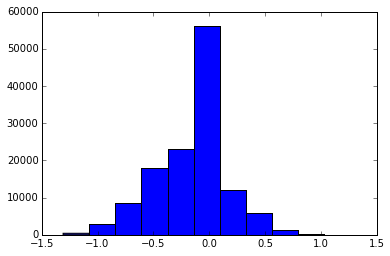

In [223]:
plt.hist(profit_random_forest)

## true profit

In [225]:
profit_true = compute_profit(second.SPREAD_CROSSING[:128324], delta_t=1000)
np.sum(profit_true)

19541.120000001905

# logistic 

### ratio

In [130]:
ratio = (X_train.ASK_PRICE1 + X_train.ASK_PRICE2 + X_train.ASK_PRICE3 + X_train.ASK_PRICE4 + X_train.ASK_PRICE5)*1.0/(X_train.BID_PRICE1 + X_train.BID_PRICE2 + X_train.BID_PRICE3 + X_train.BID_PRICE4 + X_train.BID_PRICE5)

In [144]:
X_train['ratio'] = ratio

/Users/wyshi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [152]:
X_train.columns

Index([u'BID_PRICE1', u'BID_SIZE1', u'ASK_PRICE1', u'ASK_SIZE1', u'BID_PRICE2',
       u'BID_SIZE2', u'ASK_PRICE2', u'ASK_SIZE2', u'BID_PRICE3', u'BID_SIZE3', 
       ...
       u'ASK_SDERIV2', u'ASK_SDERIV3', u'ASK_SDERIV4', u'ASK_SDERIV5',
       u'ASK_SDERIV6', u'ASK_SDERIV7', u'ASK_SDERIV8', u'ASK_SDERIV9',
       u'ASK_SDERIV10', u'ratio'],
      dtype='object', length=127)

In [153]:
from sklearn import linear_model, datasets
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X_train[:10000], y2_train[:10000])



LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [160]:
logreg.coef_[:,126]

array([-0.05396377,  0.01435427,  0.00490451])

In [81]:
y2_pre_log = logreg.predict(X_validation)

In [82]:
np.sum(y2_pre_log==y2_validation)/50837.0

0.40425280799417745

In [78]:
y2_validation.shape

(50837,)

In [83]:
y2_prob = logreg.predict_proba(X_validation)

In [90]:
y2_prob[:,0]

array([ 0.32163077,  0.29956835,  0.38174895, ...,  0.358759  ,
        0.64325755,  0.37197062])

In [161]:
np.sum(y2_prob[:,0]>0.8),np.sum(y2_prob[:,1]>0.8),np.sum(y2_prob[:,2]>0.8)

(19, 1, 0)

In [92]:
y2_prob.shape

(50837, 3)

In [104]:
np.argmax(logreg.coef_)

313

In [115]:
np.argmax(logreg.coef_[2,:])

61

In [127]:
np.max(np.abs(logreg.coef_[0,:]))

0.041624979140542008

In [120]:
logreg.coef_[:,61]

array([ 0.00481891, -0.21560394,  0.2727001 ])

In [119]:
logreg.coef_.shape

(3, 126)

In [126]:
X_train.columns[84]

'PRICE_ASK_BID'

In [103]:
#predit and put the label in second LOGISTIC REGRESSION
n_obs = second.shape[0] - delta_t
pre_spread_log = logreg.predict(second.iloc[:n_obs, col_in_x])
pre_spread_log = np.append(pre_spread_log,np.repeat(np.nan, delta_t))

pre_spread_log = pd.Series(pre_spread_log)

#second.spread_crossing = pre_SPREAD_CROSSING

In [ ]:
profit_log = pd.Series(np.repeat(np.nan,pre.shape[0]))

for i in range(pre.shape[0]):
    if pre[i] == 'up':
        profit[i] = second.iloc[i+delta_t].loc['BID_PRICE1'] - second.iloc[i].loc['ASK_PRICE1'] 
    elif pre[i] =='down':
        profit[i] = second.iloc[i].loc['BID_PRICE1'] - second.iloc[i+delta_t].loc['ASK_PRICE1'] 
    elif pre[i] == 'stationary':
        profit[i] = 0

return profit